In [1]:
%load_ext autoreload
%autoreload 2

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns

from src.mlp import MLP
from src.layer import Layer
from src.activations import *
from src.optimisers import Adam, SGD, RMSprop
from src.visualisation import plot

from sklearn.metrics import mean_squared_error, log_loss, f1_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [3]:
def get_data_regression(dataset_name):
    df_training = pd.read_csv(f"data/mio1/regression/{dataset_name}-training.csv")
    df_test = pd.read_csv(f"data/mio1/regression/{dataset_name}-test.csv")

    x_train = df_training[['x']].values
    y_train = df_training[['y']].values

    x_test = df_test[['x']].values
    y_test = df_test[['y']].values

    x_ss = StandardScaler()
    x_train = x_ss.fit_transform(x_train).T
    x_test = x_ss.transform(x_test).T

    y_ss = StandardScaler()
    y_train = y_ss.fit_transform(y_train).T
    y_test = y_ss.fit_transform(y_test).T

    return x_train, y_train, x_test, y_test

In [4]:
def get_data_classification(dataset_name):
    df_training = pd.read_csv(f"data/mio1/classification/{dataset_name}-training.csv")
    df_test = pd.read_csv(f"data/mio1/classification/{dataset_name}-test.csv")

    x_train = df_training[['x', 'y']].values.T
    y_train = df_training['c'].values.reshape(-1, 1)

    x_test = df_test[['x', 'y']].values.T
    y_test = df_test['c'].values.reshape(-1, 1)

    enc = OneHotEncoder(sparse_output=False)
    y_train_oh = enc.fit_transform(y_train).T
    y_test_oh = enc.transform(y_test).T

    standard_scaler = StandardScaler()
    x_train = standard_scaler.fit_transform(x_train.T).T
    x_test = standard_scaler.transform(x_test.T).T

    return x_train, y_train_oh, x_test, y_test_oh

In [93]:
r5_x_train, r5_y_train, r5_x_test, r5_y_test = get_data_classification("xor3")

In [161]:
sgd_optim = RMSprop(learning_rate=1e-3, learning_rate_decay=1.0)
adam_optim = Adam(learning_rate_decay=1.0)

In [162]:
model_sgd = MLP(steps=[
    Layer(2, 5), Tanh(),
    Layer(5, 5), Tanh(),
    Layer(5, 5), Tanh(),
    Layer(5, 2), Softmax()
], optimiser=sgd_optim)

model_adam = MLP(steps=[
    Layer(2, 5), Tanh(),
    Layer(5, 5), Tanh(),
    Layer(5, 5), Tanh(),
    Layer(5, 2), Softmax()
], optimiser=adam_optim)

In [163]:
loss_sgd = model_sgd.fit(r5_x_train, r5_y_train, epochs=5000, batch_size=50, verbose=2, loss_function_name="log_loss")
loss_adam = model_adam.fit(r5_x_train, r5_y_train, epochs=5000, batch_size=50, verbose=2, loss_function_name="log_loss")

epoch: 500/5000	loss: 0.12748904977708034
epoch: 1000/5000	loss: 0.05462201103896353
epoch: 1500/5000	loss: 0.036323134405753785
epoch: 2000/5000	loss: 0.029600572061475934
epoch: 2500/5000	loss: 0.025605794429798708
epoch: 3000/5000	loss: 0.022831558163818245
epoch: 3500/5000	loss: 0.023026792468512053
epoch: 4000/5000	loss: 0.01763398791864435
epoch: 4500/5000	loss: 0.023344512056483042
epoch: 5000/5000	loss: 0.016492673287414748
done! final loss: 0.016492673287414748
epoch: 500/5000	loss: 0.12446005692972954
epoch: 1000/5000	loss: 0.07569813449743115
epoch: 1500/5000	loss: 0.05630717038138252
epoch: 2000/5000	loss: 0.04375542500967863
epoch: 2500/5000	loss: 0.03395091923967192
epoch: 3000/5000	loss: 0.027276514779785398
epoch: 3500/5000	loss: 0.022285707747169526
epoch: 4000/5000	loss: 0.019124956048176964
epoch: 4500/5000	loss: 0.016791498746026902
epoch: 5000/5000	loss: 0.01503778996821518
done! final loss: 0.01503778996821518


<Axes: >

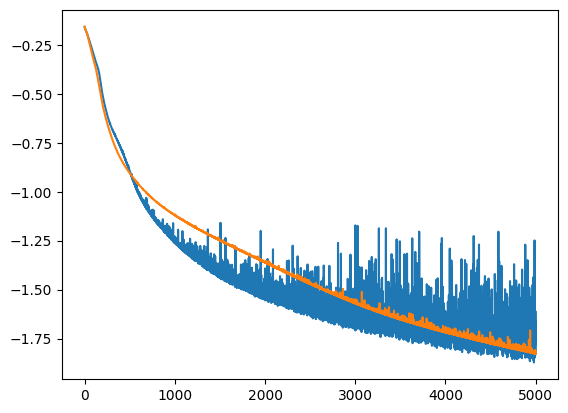

In [164]:
sns.lineplot(np.log10(loss_sgd))
sns.lineplot(np.log10(loss_adam))